<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/Ecuaci%C3%B3n_de_onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La solución de la ecuación
$$\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2}$$
k=1 y c= 1

Ahora, suponemos que $u(x,t)=X(x)T(t)$, entonces la ecuación de onda nos queda como: $XT''=X''T$, dividiendo entre $u(x)$, tenemos que $\frac{T''}{T}= \frac{X''}{X}= \lambda$ de aquí obtenemos
\
1) $X''-\lambda X= 0$, con condiciones $X(0)=0, X(1)=0$
\
2) $T''-\lambda T = 0$, con condición $T'(0)=0$

Para 1)
\
Tenemos que su solución es $X(x)=A_ncos(wx)+B_nsen(wx)$
Evaluando en las condiciones iniciales tenemos que
\
$X(0)=A_ncos(0)+Bnsen(0)=0$, así entonces $A_n=0$
\
Y $X(1)=A_ncos(1)+Bnsen(w1)=0$ , como $A_n=0 \implies B_nsen(w)=0$, ademas Bn no puede ser cero, así $sen(w)=0 \implies w=np$ \
Por lo tanto $X(x)=B_n sen(n \pi x)$

Para 2)
\
Tenemos que su solución es $T(x)=A_ncos(wt)+B_nsen(wt)$
Evaluando en las condiciones iniciales tenemos que
\
$T'(0)=-A_nsen(0)+Bncos(0)=0$, así entonces $B_n=0$
\
Así $T(t)= A_n cos(n\pi x)$
Tenemos $u(x,t)= C_ncos(n \pi x) sen(n \pi x)$
\


Derivando respecto a t, evaluando t=0 e igualando a $g(x)=0$
\
$\frac{du}{dt}=-C_n n \pi sen^2(n \pi x) + n\pi cos^2(n \pi x)=0$

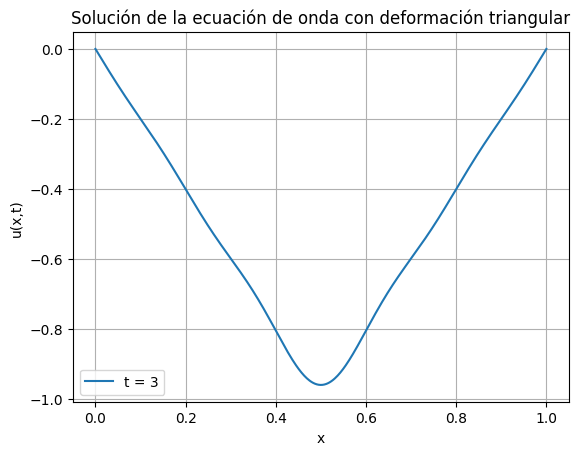

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


L = 1
k = 1
c = 1
N = 10
t = 3

def f(x):
    if 0 <= x <= L/2:
        return (2 * k / L) * x
    elif L/2 < x <= L:
        return (2 * k / L) * (L - x)
    else:
        return 0

def An(n):
    integrand = lambda x: f(x) * np.sin(n * np.pi * x / L)
    result, _ = quad(integrand, 0, L)
    return (2 / L) * result

def u(x, t):
    suma = 0
    for n in range(1, N+1):
        if n % 2 == 1:
            a_n = An(n)
            suma += a_n * np.cos(n * np.pi * c * t / L) * np.sin(n * np.pi * x / L)
    return suma


x_vals = np.linspace(0, L, 500)
u_vals = [u(x, t) for x in x_vals]


plt.plot(x_vals, u_vals, label=f't = {t}')
plt.title('Solución de la ecuación de onda con deformación triangular')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.grid(True)
plt.legend()
plt.show()